In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import cv2

# Xác định Gaussian kernel 3x3 với các giá trị sigma khác nhau
sigmas = [0.25, 0.5, 0.75, 0.95, 1.25]

# Tạo và in kernel cho từng sigma
for sigma in sigmas:
    gaussian_kernel = cv2.getGaussianKernel(3, sigma)
    kernel_2d = gaussian_kernel * gaussian_kernel.T  # Tạo kernel 2D
    print(f"Gaussian Kernel with sigma={sigma}:\n", kernel_2d, "\n")


Gaussian Kernel with sigma=0.25:
 [[1.12384321e-07 3.35012940e-04 1.12384321e-07]
 [3.35012940e-04 9.98659499e-01 3.35012940e-04]
 [1.12384321e-07 3.35012940e-04 1.12384321e-07]] 

Gaussian Kernel with sigma=0.5:
 [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]] 

Gaussian Kernel with sigma=0.75:
 [[0.05089992 0.12381027 0.05089992]
 [0.12381027 0.30115924 0.12381027]
 [0.05089992 0.12381027 0.05089992]] 

Gaussian Kernel with sigma=0.95:
 [[0.07148314 0.12439703 0.07148314]
 [0.12439703 0.2164793  0.12439703]
 [0.07148314 0.12439703 0.07148314]] 

Gaussian Kernel with sigma=1.25:
 [[0.0876809  0.12074781 0.0876809 ]
 [0.12074781 0.16628516 0.12074781]
 [0.0876809  0.12074781 0.0876809 ]] 



In [3]:
# Ma trận I (từ đề bài)
I = np.array([
    [4, 4, 1, 1, 2, 1],
    [109, 8, 8, 8, 7, 1],
    [8, 8, 8, 8, 7, 1],
    [8, 8, 8, 8, 7, 1],
    [8, 8, 8, 8, 7, 1],
    [8, 8, 7, 7, 1, 1]
])

# Áp dụng bộ lọc Gaussian mà không sử dụng biên
sigma = 0.95  # Chọn một giá trị sigma
gaussian_kernel = cv2.getGaussianKernel(3, sigma)
gaussian_kernel_2d = gaussian_kernel * gaussian_kernel.T

# Chuyển đổi ma trận I sang kiểu np.float32
I_float32 = I.astype(np.float32)

# Áp dụng bộ lọc Gaussian
G = cv2.filter2D(I_float32, -1, gaussian_kernel_2d)
print("Ảnh sau khi áp dụng bộ lọc Gaussian:\n", G)

Ảnh sau khi áp dụng bộ lọc Gaussian:
 [[31.267107  20.20531    5.116277   4.724517   3.7100077  2.9643896]
 [28.794956  19.280197   6.342906   6.00406    4.5408163  3.4935284]
 [20.5641    15.219797   8.         7.7326365  5.663183   4.2083597]
 [ 8.         8.         8.         7.7326365  5.663183   4.2083597]
 [ 8.         7.928517   7.8041196  7.107857   4.845318   3.350562 ]
 [ 8.         7.8756027  7.6591234  6.645378   4.2399106  2.7155955]]


In [4]:
# Tính giá trị G(3, 2)
G_3_2 = G[2, 1]  # Indexing theo Python (bắt đầu từ 0)
print(f"Giá trị tại G(3,2): {G_3_2}")

Giá trị tại G(3,2): 15.219797134399414


In [5]:
# Chuyển đổi ma trận I sang kiểu np.uint8
I_uint8 = I.astype(np.uint8)

# Áp dụng ngưỡng toàn cục (global thresholding)
_, threshold_global = cv2.threshold(I_uint8, 127, 255, cv2.THRESH_BINARY)
print("Ảnh sau khi phân đoạn bằng ngưỡng toàn cục:\n", threshold_global)

Ảnh sau khi phân đoạn bằng ngưỡng toàn cục:
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [6]:
# Chuyển đổi ma trận I sang kiểu np.uint8
I_uint8 = I.astype(np.uint8)

# Áp dụng ngưỡng Otsu
_, threshold_otsu = cv2.threshold(I_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Ảnh sau khi phân đoạn bằng phương pháp Otsu:\n", threshold_otsu)

Ảnh sau khi phân đoạn bằng phương pháp Otsu:
 [[  0   0   0   0   0   0]
 [255   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [7]:
# Ảnh nhị phân sau khi phân đoạn với ngưỡng T từ câu d
binary_image = threshold_global
print("Ảnh nhị phân sau khi phân đoạn với ngưỡng T:\n", binary_image)

Ảnh nhị phân sau khi phân đoạn với ngưỡng T:
 [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [8]:
# bai 2

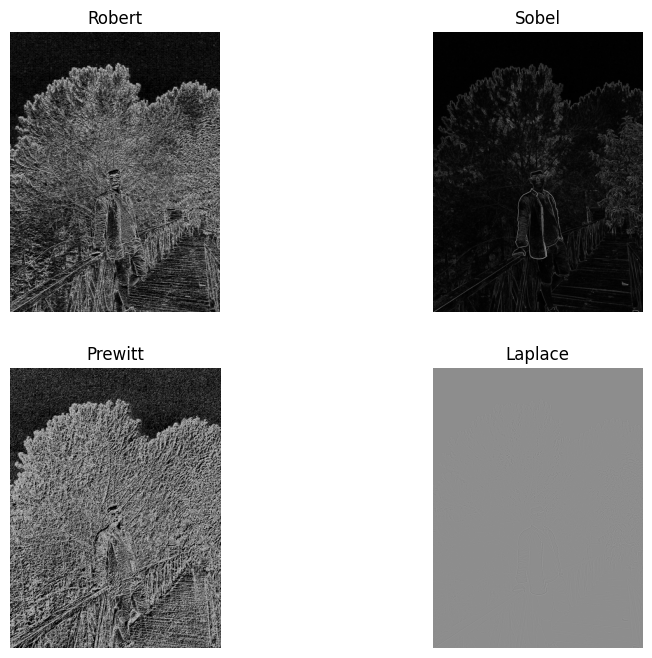

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh từ file (giả sử ảnh đã có tên là 'student_image.jpg')
image = cv2.imread('../pine.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("The image file 'student_image.jpg' was not found.")

# Robert filter
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(image, -1, roberts_kernel_y)
roberts = np.sqrt(roberts_x**2 + roberts_y**2)

# Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# Prewitt filter
prewitt_x = cv2.filter2D(image, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]))
prewitt_y = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Laplace filter
laplace = cv2.Laplacian(image, cv2.CV_64F)

# Hiển thị kết quả
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1), plt.imshow(roberts, cmap='gray')
plt.title('Robert'), plt.axis('off')

plt.subplot(2, 2, 2), plt.imshow(sobel, cmap='gray')
plt.title('Sobel'), plt.axis('off')

plt.subplot(2, 2, 3), plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt'), plt.axis('off')

plt.subplot(2, 2, 4), plt.imshow(laplace, cmap='gray')
plt.title('Laplace'), plt.axis('off')

plt.show()


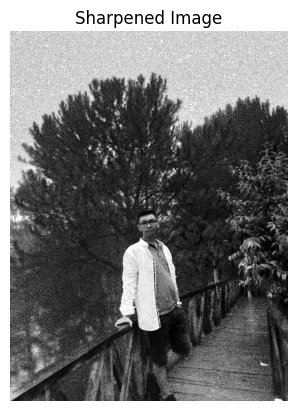

In [10]:
def sharpen_image(image):
    # Sử dụng bộ lọc Laplace để làm sắc nét
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = laplacian.astype(image.dtype)  # Ensure same data type
    sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)
    return sharpened_image

# Áp dụng hàm sharpen_image
sharpened = sharpen_image(image)

# Hiển thị ảnh sau khi làm sắc nét
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


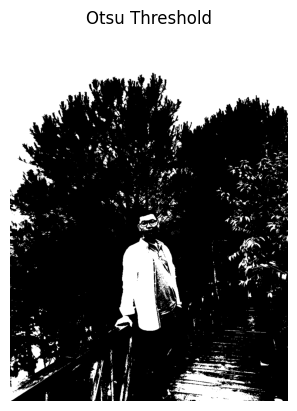

In [11]:
def threshold_otsu(image):
    _, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_thresh

# Áp dụng ngưỡng Otsu
otsu_image = threshold_otsu(image)

# Hiển thị ảnh sau khi áp dụng ngưỡng Otsu
plt.imshow(otsu_image, cmap='gray')
plt.title('Otsu Threshold')
plt.axis('off')
plt.show()


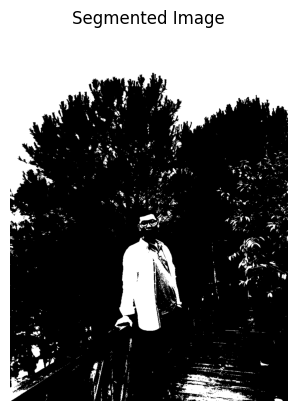

In [12]:
def segment_image(image, threshold):
    # Phân đoạn ảnh với ngưỡng
    segmented_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)[1]
    return segmented_image

# Sử dụng ảnh đã phân đoạn bằng ngưỡng Otsu
segmented = segment_image(image, 127)  # Hoặc sử dụng ngưỡng từ Otsu đã tính ở câu c
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


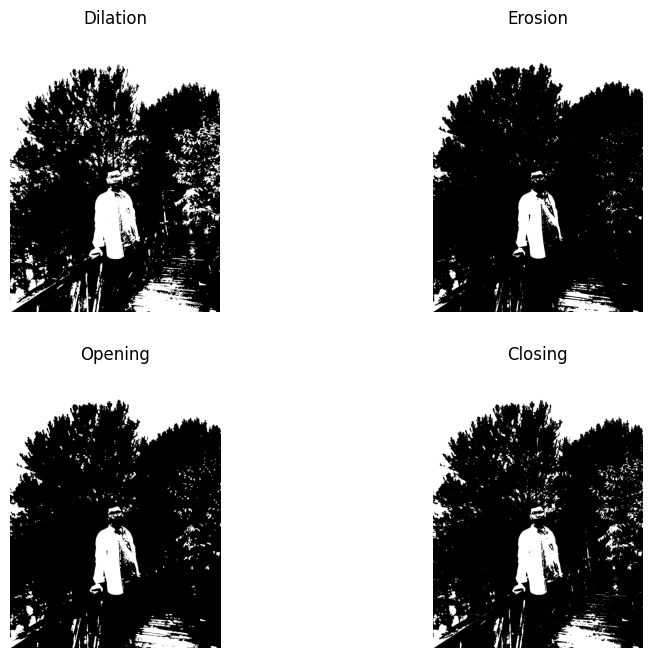

In [13]:
def morphological_processing(image):
    kernel = np.ones((3, 3), np.uint8)
    
    # Thực hiện phép dãn (dilate) và co (erode)
    dilation = cv2.dilate(image, kernel, iterations=1)
    erosion = cv2.erode(image, kernel, iterations=1)
    
    # Thực hiện phép mở (opening) và đóng (closing)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    return dilation, erosion, opening, closing

# Áp dụng xử lý hình thái
dilation, erosion, opening, closing = morphological_processing(otsu_image)

# Hiển thị kết quả
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1), plt.imshow(dilation, cmap='gray')
plt.title('Dilation'), plt.axis('off')

plt.subplot(2, 2, 2), plt.imshow(erosion, cmap='gray')
plt.title('Erosion'), plt.axis('off')

plt.subplot(2, 2, 3), plt.imshow(opening, cmap='gray')
plt.title('Opening'), plt.axis('off')

plt.subplot(2, 2, 4), plt.imshow(closing, cmap='gray')
plt.title('Closing'), plt.axis('off')

plt.show()


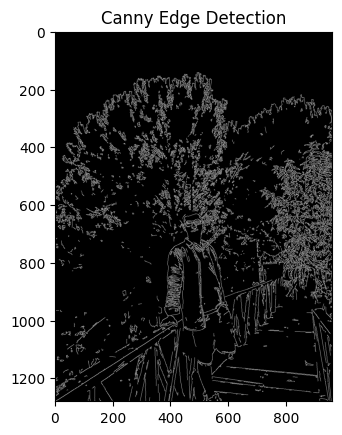

In [14]:
# Sử dụng Canny để xác định biên ảnh
edges = cv2.Canny(image, 100, 200)

# Hiển thị ảnh biên
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()
